In [1]:
import pandas as pd
import numpy as np

In [3]:
train_data = pd.read_csv("/kaggle/input/fake-news-classifier/data/train.csv/train.csv")

In [4]:
train_data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
train_data.shape

(20800, 5)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [7]:
train_data.dropna(inplace = True)

In [8]:
train_data.shape

(18285, 5)

In [9]:
train_data.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [10]:
X_train = train_data.drop(['label'], axis = 1)
X_train

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [11]:
y_train = train_data['label']
y_train

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 18285, dtype: int64

In [12]:
y_train.value_counts()

label
0    10361
1     7924
Name: count, dtype: int64

In [13]:
import re
import nltk
from nltk.corpus import stopwords

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
X_train.reset_index(inplace = True)

In [16]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(X_train)):
    if i%2000 == 0:
        print(f"Stemming done for {i} news titles.")

    review = re.sub('[^a-zA-Z]', ' ', X_train['title'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

Stemming done for 0 news titles.
Stemming done for 2000 news titles.
Stemming done for 4000 news titles.
Stemming done for 6000 news titles.
Stemming done for 8000 news titles.
Stemming done for 10000 news titles.
Stemming done for 12000 news titles.
Stemming done for 14000 news titles.
Stemming done for 16000 news titles.
Stemming done for 18000 news titles.


In [17]:
corpus[:20]

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [22]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

In [23]:
vocab_size = 20000

In [24]:
one_hot_rep = [one_hot(word, vocab_size) for word in corpus]
one_hot_rep[:20]

[[7043, 17159, 900, 16935, 1524, 10295, 9742, 10055, 1601, 12064],
 [16531, 3271, 19289, 11635, 12996, 4369, 17209],
 [16159, 1571, 18129, 3679],
 [9529, 6667, 9169, 19839, 14747, 17233],
 [13554, 12996, 16622, 18414, 16521, 2192, 12996, 16058, 3406, 2119],
 [18423,
  4424,
  18682,
  1494,
  14086,
  13600,
  7540,
  9287,
  4083,
  4782,
  8658,
  14343,
  10083,
  1278,
  17209],
 [13152, 3166, 9494, 13573, 5177, 13638, 5935, 8895, 17796, 2756, 2392],
 [719, 13283, 17123, 19537, 8315, 12743, 13600, 18912, 17796, 2756, 2392],
 [12072, 8847, 19936, 17829, 19642, 5104, 8073, 19176, 13600, 5137],
 [11958, 8169, 15476, 15216, 11179, 725, 19201, 16914],
 [523, 17190, 9151, 5350, 7697, 566, 16657, 7781, 4259, 3884, 15711],
 [19839, 1358, 1524, 5104, 13600, 8315],
 [11818, 5027, 10085, 11884, 4221, 17987, 6007, 6277, 3401],
 [3688, 6600, 16365, 14304, 8592, 8171, 4569, 17796, 2756, 2392],
 [6759, 16872, 423, 9328, 11587, 17796, 2756, 2392],
 [16409, 1789, 9290, 13098, 6818, 5663, 8708, 7429

In [25]:
max_sentence_len = 30
padded_one_hot_rep = pad_sequences(one_hot_rep, maxlen = max_sentence_len, padding = 'pre')
padded_one_hot_rep[:50]

array([[    0,     0,     0, ..., 10055,  1601, 12064],
       [    0,     0,     0, ..., 12996,  4369, 17209],
       [    0,     0,     0, ...,  1571, 18129,  3679],
       ...,
       [    0,     0,     0, ...,   796,  7073, 16970],
       [    0,     0,     0, ..., 19839,  5073,   170],
       [    0,     0,     0, ..., 17796,  2756,  2392]], dtype=int32)

In [26]:
padded_one_hot_rep.shape

(18285, 30)

In [31]:
from keras import layers, models

embedding_features = 50

input_layer = layers.Input(shape=(max_sentence_len,), name='input_layer')
x = layers.Embedding(vocab_size, output_dim=embedding_features, name='embedding_layer')(input_layer)
x = layers.Dropout(0.3)(x)
x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, name='bidirectional_lstm_1'))(x)
x = layers.Bidirectional(layers.LSTM(128, name='bidirectional_lstm_2'))(x)
x = layers.Dropout(0.3)(x)
output_layer = layers.Dense(1, activation='sigmoid', name='output_layer')(x)

model = models.Model(inputs=input_layer, outputs=output_layer, name='FakeNewsClassifier')

In [32]:
model.summary()

Model: "FakeNewsClassifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_layer (Embedding)     │ (None, 30, 50)         │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 30, 256)        │       183,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ (None, 256)            │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,577,793 (6.02 MB)

 Trainable params: 1,577,793 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = ['accuracy'])

In [34]:
pad_embedd_X_train = np.array(padded_one_hot_rep)
y_train_arr = np.array(y_train)

In [35]:
pad_embedd_X_train.shape

(18285, 30)

In [36]:
y_train_arr.shape

(18285,)

In [38]:
epochs = 10
batch_size = 256

from sklearn.model_selection import train_test_split

(X_train, X_test, y_train, y_test) = train_test_split(pad_embedd_X_train, y_train_arr, test_size = 0.1, random_state = 42)

history = model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_split = 0.1, verbose = 1)

Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.7512 - loss: 0.4781 - val_accuracy: 0.9156 - val_loss: 0.1987
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9448 - loss: 0.1459 - val_accuracy: 0.9247 - val_loss: 0.1722
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9664 - loss: 0.0958 - val_accuracy: 0.9228 - val_loss: 0.1869
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9795 - loss: 0.0644 - val_accuracy: 0.9198 - val_loss: 0.2034
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9865 - loss: 0.0465 - val_accuracy: 0.9210 - val_loss: 0.2314
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9877 - loss: 0.0351 - val_accuracy: 0.9301 - val_loss: 0.2512
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9931 - loss: 0.0255 - val_accuracy: 0.9247 - val_loss: 0.2685
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9955 - loss: 0.0183 - val_accuracy: 0.9253 - v

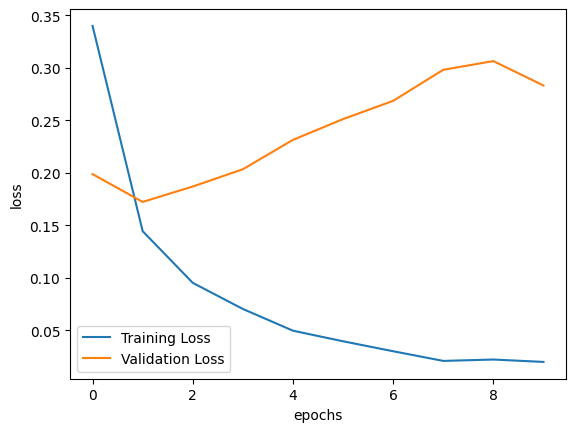

In [41]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


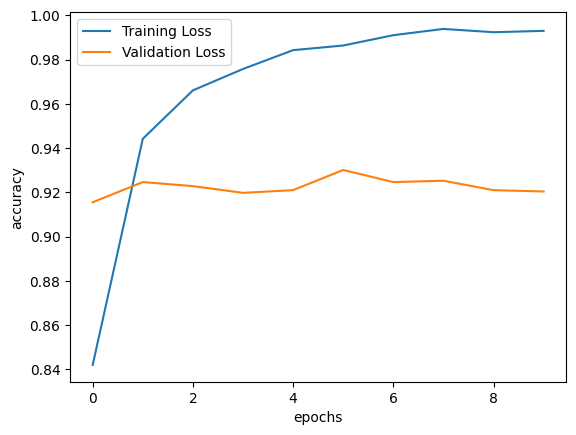

In [42]:
plt.plot(history.history['accuracy'], label = 'Training Loss')
plt.plot(history.history['val_accuracy'], label = 'Validation Loss')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [43]:
y_pred = model.predict(X_test)

58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [44]:
model.evaluate(X_test, y_test)

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9127 - loss: 0.3754


[0.38207733631134033, 0.9070530533790588]

In [45]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred.round())

print(f"Mean Squared Error = {mse}")
print(f"R2 Score = {r2}")
print(f"Accuracy = {round(accuracy*100, 4)} %")


Mean Squared Error = 0.07899101078029064
R2 Score = 0.6783584551436188
Accuracy = 90.7053 %


In [46]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred.round()))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1036
           1       0.89      0.90      0.89       793

    accuracy                           0.91      1829
   macro avg       0.91      0.91      0.91      1829
weighted avg       0.91      0.91      0.91      1829



In [47]:
model.save("fake-news-detector-keras-embedding.h5")